# House Price Prediction project using sckilearn

Machine Learning Models I will use 

1.Linear Regression
2.Decision Tree Regression
3.Lasso
4.Naive Bayes

In [1]:
# Import all labraries needed for data munging and data visiulization

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import data as csv file from local machine

df = pd.read_csv('C:\\Users\\DercoN\\Desktop\\Python\\csv_files\\Project1.csv' , delimiter=';')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# Check shape 

df.shape

(13320, 9)

In [5]:
# Null Values , and which columns with high number of null values
# Will check percentage of null values of each columns 
# If column has null values of more than 30% I will remove from dataframe

df_null_values = pd.DataFrame((df.isnull().sum())/df.shape[0]*100, columns=['%_of_missing_values'])

In [6]:
df_null_values

,%_of_missing_values
area_type,0.000000
availability,0.000000
location,0.007508
size,0.120120
society,41.306306
total_sqft,0.000000
bath,0.548048
balcony,4.572072
price,0.000000


In [7]:
# society column has high number of missing values , I will remove it from dataframe

df.drop(['society'], axis='columns' , inplace=True)

In [8]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [9]:
df.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [10]:
# From dataframe above I assume columns area_type  and availability is not really important for my preditictive models

df1=df.drop(['area_type','availability' , 'balcony'], axis='columns')

In [11]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
# Drop nan values 

df1.dropna(inplace=True)

In [13]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [14]:
# Observe column "size" , clean and transform it if needed

df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
# Convert column 'size'  to data-type "int"
# Will use lambda to split it and first index value , as second index is just text 'bedroom'

df1['size'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))

In [16]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [17]:
# Observe column total_sqft , clean and transform it if needed

df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
# Looks like it needes some cleaning as some data only gives ranges like ' 1122-1384'
# Lambda technique wont work here , I will build a function to convert those ranges to whole number

In [19]:
def convert_to_mean(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return( float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [20]:
df1['total_sqft'] = df1['total_sqft'].apply(convert_to_mean)

In [21]:
df1['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [22]:
# It looks clean now
# Check for nan values on dataframe and decide whether to drop them or fill with mean

In [23]:
df1.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
dtype: int64

In [24]:
# Fill nan values on column 'total_sqft' with mean

df1['total_sqft'] = df1['total_sqft'].fillna(df1['total_sqft'].mean())

In [25]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [26]:
df1.dtypes

location       object
size            int64
total_sqft    float64
bath          float64
price         float64
dtype: object

In [27]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [28]:
# Looks like in some cases the total number of bath is greater than total of bedrooms 

df1.loc[1]

location      Chikka Tirupathi
size                         4
total_sqft              2600.0
bath                       5.0
price                    120.0
Name: 1, dtype: object

In [29]:
# Remove all rows where bath is greater than size

df1[df1['bath'] > df1['size']]

,location,size,total_sqft,bath,price
1,Chikka Tirupathi,4,2600.0,5.0,120.0
11,Whitefield,4,2785.0,5.0,295.0
18,Ramakrishnappa Layout,3,2770.0,4.0,290.0
22,Thanisandra,4,2800.0,5.0,380.0
45,HSR Layout,8,600.0,9.0,200.0
...,...,...,...,...,...
13299,Whitefield,4,2856.0,5.0,154.5
13300,Hosakerehalli,5,1500.0,6.0,145.0
13306,Rajarajeshwari Nagara,4,1200.0,5.0,325.0
13311,Ramamurthy Nagar,7,1500.0,9.0,250.0


In [30]:
df2 = df1[~(df1['bath'] > df1['size'])]

In [31]:
df2[df2['bath'] > df2['size']]

,location,size,total_sqft,bath,price


All rows where bath is greater than size is removed

In [32]:
# Create new column for price per square meter ,and convert it to right convertion (million)

df2['price_sqft'] = df2['price']*100000 / df2['total_sqft']

C:\Users\DercoN\AppData\Local\Temp\ipykernel_11880\3050889291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price_sqft'] = df2['price']*100000 / df2['total_sqft']


In [33]:
df2.head(10)

,location,size,total_sqft,bath,price,price_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
5,Whitefield,2,1170.0,2.0,38.00,3247.863248
6,Old Airport Road,4,2732.0,4.0,10.00,366.032211
7,Rajaji Nagar,4,3300.0,4.0,600.00,18181.818182
8,Marathahalli,3,1310.0,3.0,63.25,4828.244275
9,Gandhi Bazar,6,1020.0,6.0,370.00,36274.509804
10,Whitefield,3,1800.0,2.0,70.00,3888.888889


In [34]:
df2.price_sqft.mean()

7767.2091197061345

In [35]:
# I assume average square foot of one bedroom apartment is between 300-400

In [36]:
df2.loc[9]

location      Gandhi Bazar
size                     6
total_sqft          1020.0
bath                   6.0
price                370.0
price_sqft    36274.509804
Name: 9, dtype: object

In [37]:
# From above row looks like outlier to me as it is way below average square foot of one bedroom apartment
# Remove all rows with below average square foot of 300 

df2[df2['total_sqft'] / df2['size'] <300]

,location,size,total_sqft,bath,price,price_sqft
9,Gandhi Bazar,6,1020.0,6.0,370.0,36274.509804
58,Murugeshpalya,6,1407.0,4.0,150.0,10660.980810
68,Devarachikkanahalli,8,1350.0,7.0,85.0,6296.296296
70,Double Road,3,500.0,3.0,100.0,20000.000000
78,Kaval Byrasandra,2,460.0,1.0,22.0,4782.608696
...,...,...,...,...,...,...
13221,T Dasarahalli,9,1178.0,9.0,75.0,6366.723260
13277,Kundalahalli Colony,7,1400.0,7.0,218.0,15571.428571
13279,Vishwanatha Nagenahalli,6,1200.0,5.0,130.0,10833.333333
13281,Margondanahalli,5,1375.0,5.0,125.0,9090.909091


In [38]:
df3 = df2[~(df2['total_sqft'] / df2['size'] <300)]

In [39]:
df3[df3['total_sqft'] / df3['size'] <300]

,location,size,total_sqft,bath,price,price_sqft


All row where square foot is below average are removed

In [40]:
# Check price_sqft I created if needes some attention 

df3.price_sqft.describe()

count     11671.000000
mean       6076.883645
std        3905.117389
min         267.829813
25%        4166.666667
50%        5188.679245
75%        6666.666667
max      176470.588235
Name: price_sqft, dtype: float64

<Axes: xlabel='price_sqft'>

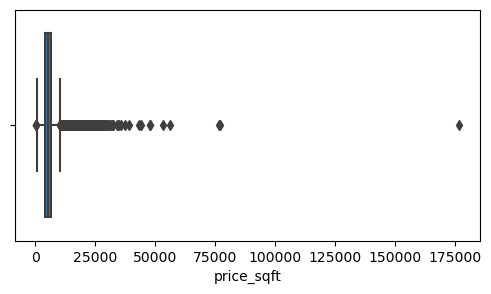

In [41]:
# Max is way above the mean

plt.figure(figsize=(6,3))
sns.boxplot(data = df3 , x='price_sqft')

In [42]:
# It is clear from above boxplot that there is outliers
# Remove outliers on column price_sqft using quantiles method

In [43]:
Q1 = df3.price_sqft.quantile(0.25)
Q3 = df3.price_sqft.quantile(0.75)

Q1,Q3

(4166.666666666667, 6666.666666666667)

In [44]:
IQR = Q3 - Q1

In [45]:
IQR

2500.0

In [46]:
lower_limt = Q1 - 1.5*IQR
upper_limt = Q3 + 1.5*IQR

In [47]:
df3[(df3.price_sqft<lower_limt) | (df3.price_sqft>upper_limt)]

,location,size,total_sqft,bath,price,price_sqft
6,Old Airport Road,4,2732.0,4.0,10.0,366.032211
7,Rajaji Nagar,4,3300.0,4.0,600.0,18181.818182
48,KR Puram,2,800.0,1.0,130.0,16250.000000
57,Ramakrishnappa Layout,2,1500.0,2.0,185.0,12333.333333
93,ISRO Layout,4,1200.0,4.0,155.0,12916.666667
...,...,...,...,...,...,...
13261,Havanur extension,3,2000.0,2.0,360.0,18000.000000
13262,Abshot Layout,2,1140.0,1.0,185.0,16228.070175
13290,Sarjapur Road,4,4050.0,2.0,450.0,11111.111111
13296,Cox Town,2,1200.0,2.0,140.0,11666.666667


In [48]:
df4 = df3[~((df3.price_sqft<lower_limt) | (df3.price_sqft>upper_limt))]

In [49]:
df4.price_sqft.describe()

count    10777.000000
mean      5282.413982
std       1641.009659
min        500.000000
25%       4077.669903
50%       5000.000000
75%       6250.000000
max      10416.666667
Name: price_sqft, dtype: float64

<Axes: xlabel='price_sqft'>

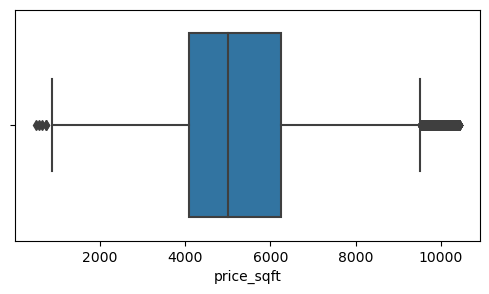

In [50]:
plt.figure(figsize=(6,3))
sns.boxplot(data = df4 , x='price_sqft')

Revisting size column

In [51]:
df4['size'].describe()

count    10777.000000
mean         2.519718
std          0.867314
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: size, dtype: float64

<Axes: xlabel='size'>

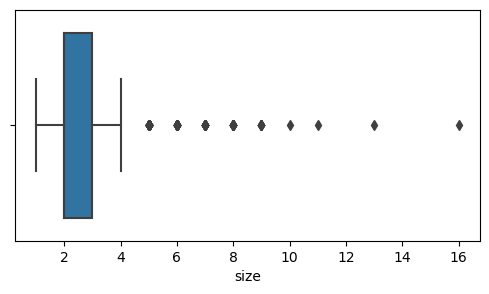

In [52]:
plt.figure(figsize=(6,3))
sns.boxplot(data = df4 , x='size')

In [53]:
#Looks like there are outliers , I will remove all rows with size more than 8

df4[df4['size']>8]

,location,size,total_sqft,bath,price,price_sqft
459,1 Giri Nagar,11,5000.0,9.0,360.0,7200.000000
538,Mico Layout,9,5000.0,9.0,210.0,4200.000000
2826,Kadugodi,9,6200.0,9.0,200.0,3225.806452
3609,Koramangala Industrial Layout,16,10000.0,16.0,550.0,5500.000000
3841,Lakkasandra,9,4500.0,9.0,166.0,3688.888889
8050,Raja Rajeshwari Nagar,9,3600.0,9.0,240.0,6666.666667
8891,KR Puram,9,4600.0,9.0,200.0,4347.826087
9935,1Hoysalanagar,13,5425.0,13.0,275.0,5069.124424
10088,Gnana Bharathi,9,3200.0,8.0,130.0,4062.500000
11142,Munnekollal,10,7200.0,10.0,200.0,2777.777778


In [54]:
df5 = df4[~(df4['size']>8)]

In [55]:
df5.head()

,location,size,total_sqft,bath,price,price_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
5,Whitefield,2,1170.0,2.0,38.00,3247.863248


In [56]:
df_correlation  = df4.corr()

C:\Users\DercoN\AppData\Local\Temp\ipykernel_11880\3056801280.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlation  = df4.corr()


<Axes: >

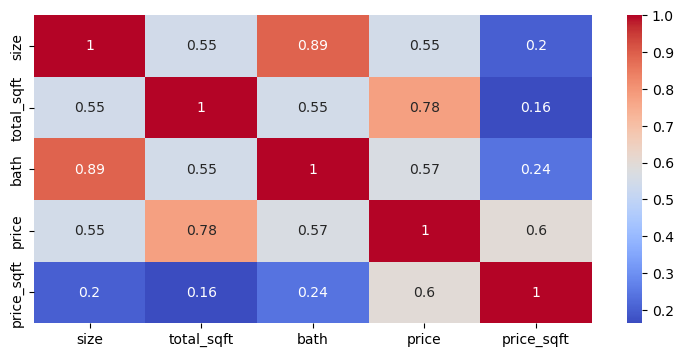

In [57]:
plt.figure(figsize=(9,4))

sns.heatmap(df_correlation , cmap='coolwarm' ,annot=True)

In [58]:
# There is positive correlation of all columns on data

# Check skewness of all columns

size
Skew :  1.49


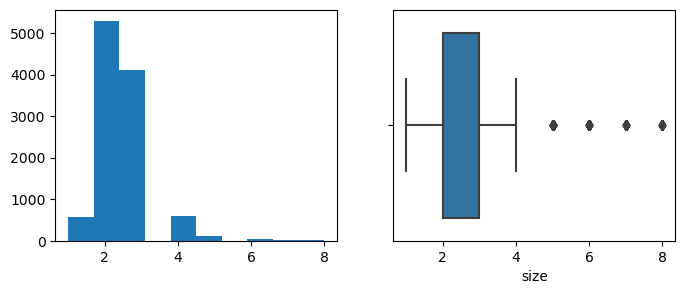

total_sqft
Skew :  15.49


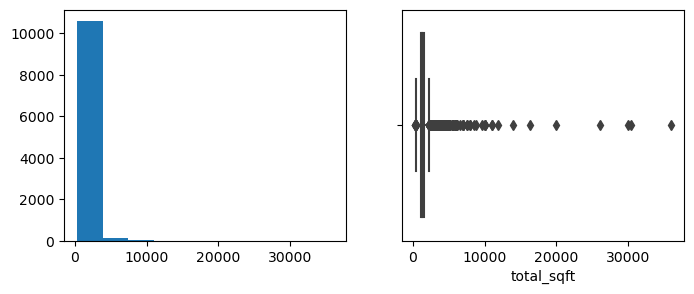

bath
Skew :  1.74


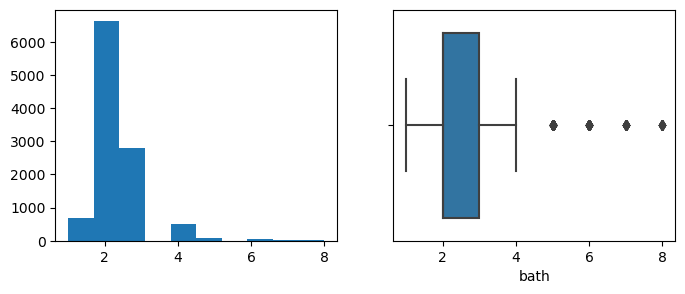

price
Skew :  8.47


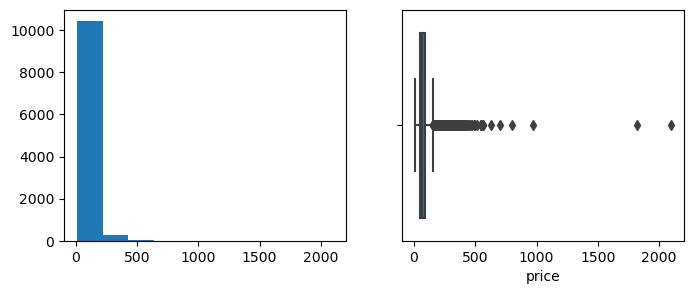

price_sqft
Skew :  0.72


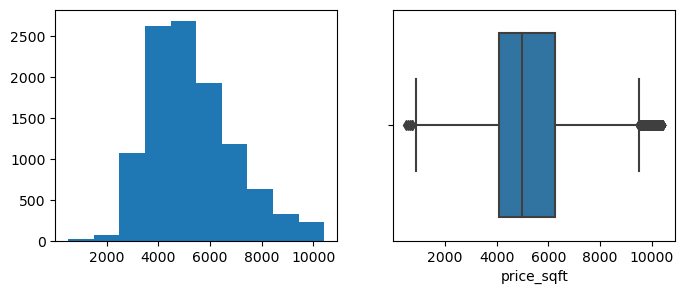

In [59]:
for col in df5.columns[1:]:
    print(col)
    print('Skew : ', round(df5[col].skew(),2))
    
    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)
    df5[col].hist(bins=10 , grid=False)
    
    plt.subplot(1,2,2)
    sns.boxplot(data=df5 , x=df5[col])
    
    plt.show()

In [60]:
# All columns are skewed to right direction
#Might need to revisit price_sqft column , We'll see 

C:\Users\DercoN\AppData\Local\Temp\ipykernel_11880\1981363639.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_size2 = d[(df['location']==location) & (d['size']==2)]
C:\Users\DercoN\AppData\Local\Temp\ipykernel_11880\1981363639.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_size3 = d[(df['location']==location) & (d['size']==3)]


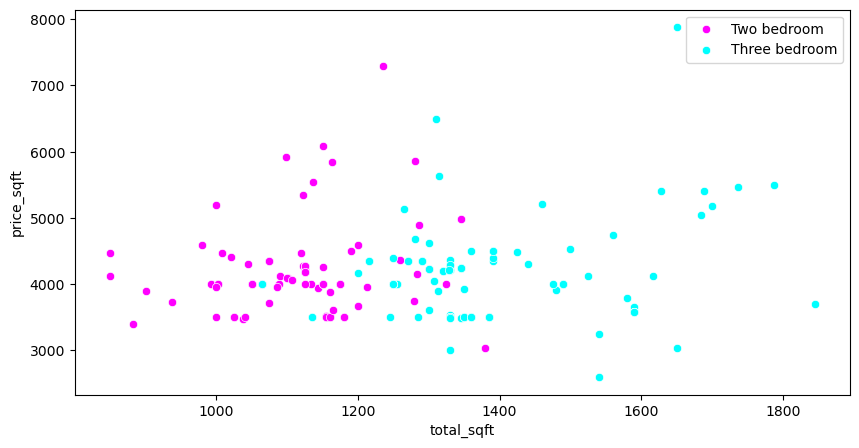

In [61]:
def scatterplott(d,location):
    df_size2 = d[(df['location']==location) & (d['size']==2)]
    df_size3 = d[(df['location']==location) & (d['size']==3)]
    
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=df_size2 , x=df_size2['total_sqft'] , y=df_size2['price_sqft'] , markers='+' , color='magenta' ,label='Two bedroom')
    sns.scatterplot(data=df_size3 , x=df_size3['total_sqft'] , y=df_size3['price_sqft'], color='cyan' ,label='Three bedroom' )
    
    plt.show()
    
scatterplott(df5,'Uttarahalli')

In [62]:
#from above scatterplot some two bed apartments are more expensive than 3 bed apartment of same total_sqft in same location
#it can be because of type of apartment or other things ,I will try to minimize it

In [63]:
def remove_outliers(d):
    exclude_indices = np.array([])
    
    for location , location_df in d.groupby('location'):
        size_stats={}
        
        for siz , size_df in location_df.groupby('size'):
            size_stats[siz] = {
                'mean':np.mean(size_df.price_sqft),
                'std': np.std(size_df.price_sqft),
                'count':size_df.shape[0]
            }
            
        for siz, size_df in location_df.groupby('size'):
            stats = size_stats.get(siz-1)
            if stats and stats['count']>1:
                exclude_indices = np.append(exclude_indices, size_df[size_df.price_sqft<(stats['mean'])].index.values)
                
    return d.drop(exclude_indices, axis ='index')
    
df6 =remove_outliers(df5)

C:\Users\DercoN\AppData\Local\Temp\ipykernel_11880\1981363639.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_size2 = d[(df['location']==location) & (d['size']==2)]
C:\Users\DercoN\AppData\Local\Temp\ipykernel_11880\1981363639.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_size3 = d[(df['location']==location) & (d['size']==3)]


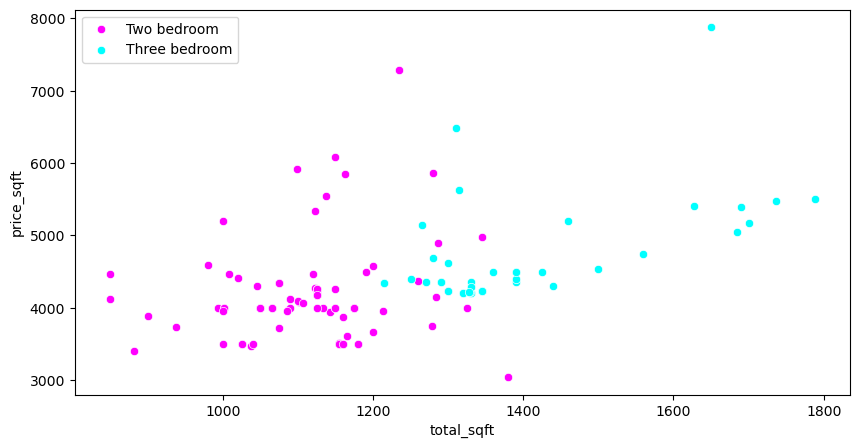

In [64]:
scatterplott(df6,'Uttarahalli')

It did not make much diffrence but some of the errors are removed .

Predictive models building

In [65]:
#import all sckitlearn libraries needed

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,ShuffleSplit,cross_val_score
from sklearn.model_selection import train_test_split

In [77]:
#Convert location column to dummies

dummies = pd.get_dummies(df6['location'])

In [120]:
dummies

,Anekal,Banaswadi,Basavangudi,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Sector 1 HSR Layout,Thanisandra,...,mvj engineering college,near Ramanashree California resort,pavitra paradise,"ravindra nagar, T.dasarahalli peenya",rr nagar,sankeswari,sapthagiri Layout,sarjapura main road,tc.palya,whitefiled
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
merge = pd.concat([df6,dummies],axis='columns')

In [122]:
df7 = merge.drop(['location','price_sqft'] , axis='columns')

In [123]:
df7.head()

,size,total_sqft,bath,price,Anekal,Banaswadi,Basavangudi,Devarabeesana Halli,Devarachikkanahalli,Electronic City,...,mvj engineering college,near Ramanashree California resort,pavitra paradise,"ravindra nagar, T.dasarahalli peenya",rr nagar,sankeswari,sapthagiri Layout,sarjapura main road,tc.palya,whitefiled
2,3,1440.0,2.0,62.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1521.0,3.0,95.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,3,2250.0,3.0,148.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,2,1175.0,2.0,73.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,3,1180.0,3.0,48.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
# Split data into test and training sets

X = df7.drop(['price'] , axis='columns')
y = df7['price']

In [141]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.3 ,random_state=20)

In [142]:
# I will keep on adjusting random_state till I get the one that is giving hisghest score

In [143]:
    
models = {
     'LinearRegression':LinearRegression(),
     'Lasso':Lasso(),
     'DecisionTreeRegressor':DecisionTreeRegressor()  
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
        
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
        
    score=model.score(X_test,y_test)
    
    print(list(models.keys())[i])
    
    print('Score {:.4f}\n'.format(score))

LinearRegression
Score 0.8138

Lasso
Score 0.8048

DecisionTreeRegressor
Score 0.7778



In [118]:
# LinearRegression is giving the highest score therefore for predictions I recomend it .